# 1D heat equation, finite difference, forward Euler
_Gilbert François Duivesteijn_

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

Let's solve the equation

\begin{equation}\label{eq:1}
\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2}
\end{equation}

in a 1D space. Writing out numerically the diffusion part with second order precision, is:

\begin{equation}\label{eq:2}
\frac{\partial u}{\partial t} = \kappa \frac{u_{i-1} - 2u_i + u_{i+1}}{\Delta x^2}
\end{equation}

Writing the time derivative numerically with first order precision gives:
\begin{equation}\label{eq:3}
 \frac{\partial u}{\partial t} = \frac{u_{t+1} - u_t}{\Delta t}
\end{equation}

Combining (\ref{eq:2}) and (\ref{eq:3}) gives us a way to solve (\ref{eq:1}) with the Euler method:
\begin{equation}\label{eq:4}
u_{t+1} = u_t + \frac{\partial u}{\partial t}\cdot \Delta t
\end{equation}

Combining (\ref{eq:2}) and (\ref{eq:4}) gives the final equation to solve:
\begin{equation}\label{eq:5}
u_{i+1} = u_i + \kappa \frac{\Delta t}{\Delta x^2} \left(u_{i-1} - 2u_i + u_{i+1} \right)
\end{equation}

where $\kappa \frac{\Delta t}{\Delta x^2}$ (known as CFL number) should be $<1$ for numerical stability.

## Example problem

Let's assume a 1D space with 2 walls. At the initial state the walls and the air in between has a temperature of 0 degrees Celcius. At time $t_0$ the left wall is set to 100 degrees Celcius and the right wall is kept at 0 degrees celcius. How does the air in between the walls heat up over time?

In [3]:
# Constant kappa
k = 0.001

# Spacial domain
n = 50                   # number of nodes
L = 1                    # distance between the walls
dx = L/n                 # space delta between nodes
x = np.linspace(0, L, n)

# Time steps
T0 = 0
Tn = 240
t_steps = (Tn - T0)*10
dt = (Tn - T0)/t_steps   # time increment for the Euler method

# Boundary conditions
U0 = 100                 # Boundary temperature at x=0 (Dirichlet boundary condition)
U1 = 0                   # Boundary temperature at x=L (Dirichlet boundary condition)

# Initial condition, u(x,0)=0
Uinit = 0                # Initial air temperature

# Courant-Friedrichs-Levy number
CFL = k * dt / dx**2
print(f"CFL: {CFL:0.3f} < 0.5")
assert CFL < 0.5

CFL: 0.250 < 0.5


In [4]:
# Initial u
u = np.ones(shape=(t_steps, n)) * Uinit

# Differential matrix. (Note that the matrix includes the nodes at the walls. The derivative is zero at the walls)
D = np.zeros(shape=(n, n))
for i in range(1, n-1):
    D[i, i-1] = 1
    D[i, i] = -2
    D[i, i+1] = 1

# partial derivative vector du/dt
dudt = np.zeros(shape=(n))

In [5]:
print("\nu =")
print(u)
print("\nD =")
print(D)


u =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

D =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [6]:
for t in range(0, t_steps-1):
    u[t, 0] = U0
    u[t, n-1] = U1
    dudt = k * np.matmul(D, u[t])/dx**2
    u[t+1] = u[t] + dudt * dt

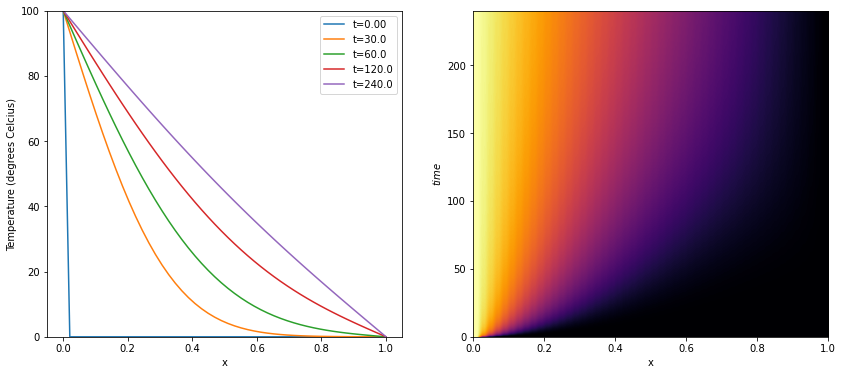

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].set_ylim(min(U0,U1),max(U0,U1))
axs[0].plot(x, u[0], label=f"t={0 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[299], label=f"t={300 * Tn/t_steps:0.1f}")
axs[0].plot(x, u[599], label=f"t={600 * Tn/t_steps:0.1f}")
axs[0].plot(x, u[1199], label=f"t={1200 * Tn/t_steps:0.1f}")
axs[0].plot(x, u[2399], label=f"t={2400 * Tn/t_steps:0.1f}")
axs[0].legend()
axs[0].set_ylabel("Temperature (degrees Celcius)")
axs[0].set_xlabel("x")
axs[1].imshow(u, aspect="auto", cmap="inferno", origin="lower", extent=[0, 1, T0, Tn])
axs[1].set_xlabel("x")
axs[1].set_ylabel("$time$")
plt.show()

In [11]:
# Generate an animation for the solution integrated over time. (Takes a long time... Please be patient.)

def animate(frame):
    y = u[frame]
    line.set_data((x, y))
    plt.title(f"t={Tn * frame / t_steps:0.2f}")

    
fig = plt.figure(figsize=(6, 6))
lines = plt.plot([])
line = lines[0]
plt.xlim([0, L])
plt.ylim([0, U0])
plt.title("")
plt.ylabel("Temperature (degrees Celcius)")
plt.xlabel("x")
  
anim = FuncAnimation(fig, animate, frames=t_steps, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()